# **Importing Libraries**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

# **Load the dataset**

In [4]:
df = pd.read_csv(r'D:\RATHNA\FITA ACADEMY\heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [8]:
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [9]:
# Check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 # **Visualize the target variable**

In [16]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

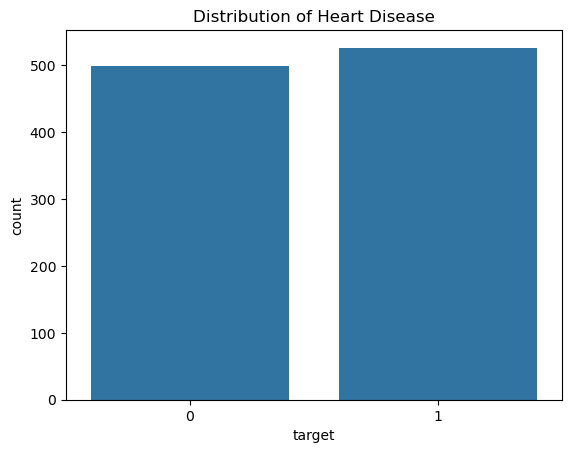

In [18]:
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease')
plt.show()

# **Data Splitting**

In [21]:
X = df.drop('target', axis=1)
y = df['target']

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Training**

**Logistic Regression**

In [17]:
model = LogisticRegression(max_iter=2000)

In [18]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [19]:
# Predictions
y_pred = model.predict(X_test)

In [20]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [21]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[73 29]
 [13 90]]


**2. DecisionTreeClassifier**

In [24]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
#predict and evaluate
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy:0.99
Confusion Matrix:
 [[102   0]
 [  3 100]]


In [26]:
classifier = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [27]:

# Predict on the test set
y_pred = classifier.predict(X_test)

In [28]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[71 31]
 [10 93]]


In [29]:
# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



In [30]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [31]:
# Initialize and train the Decision Tree Classifier
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [32]:
# Predict on the test set
y_pred = classifier.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


In [34]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       102
           1       0.75      0.88      0.81       103

    accuracy                           0.79       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.79      0.79       205



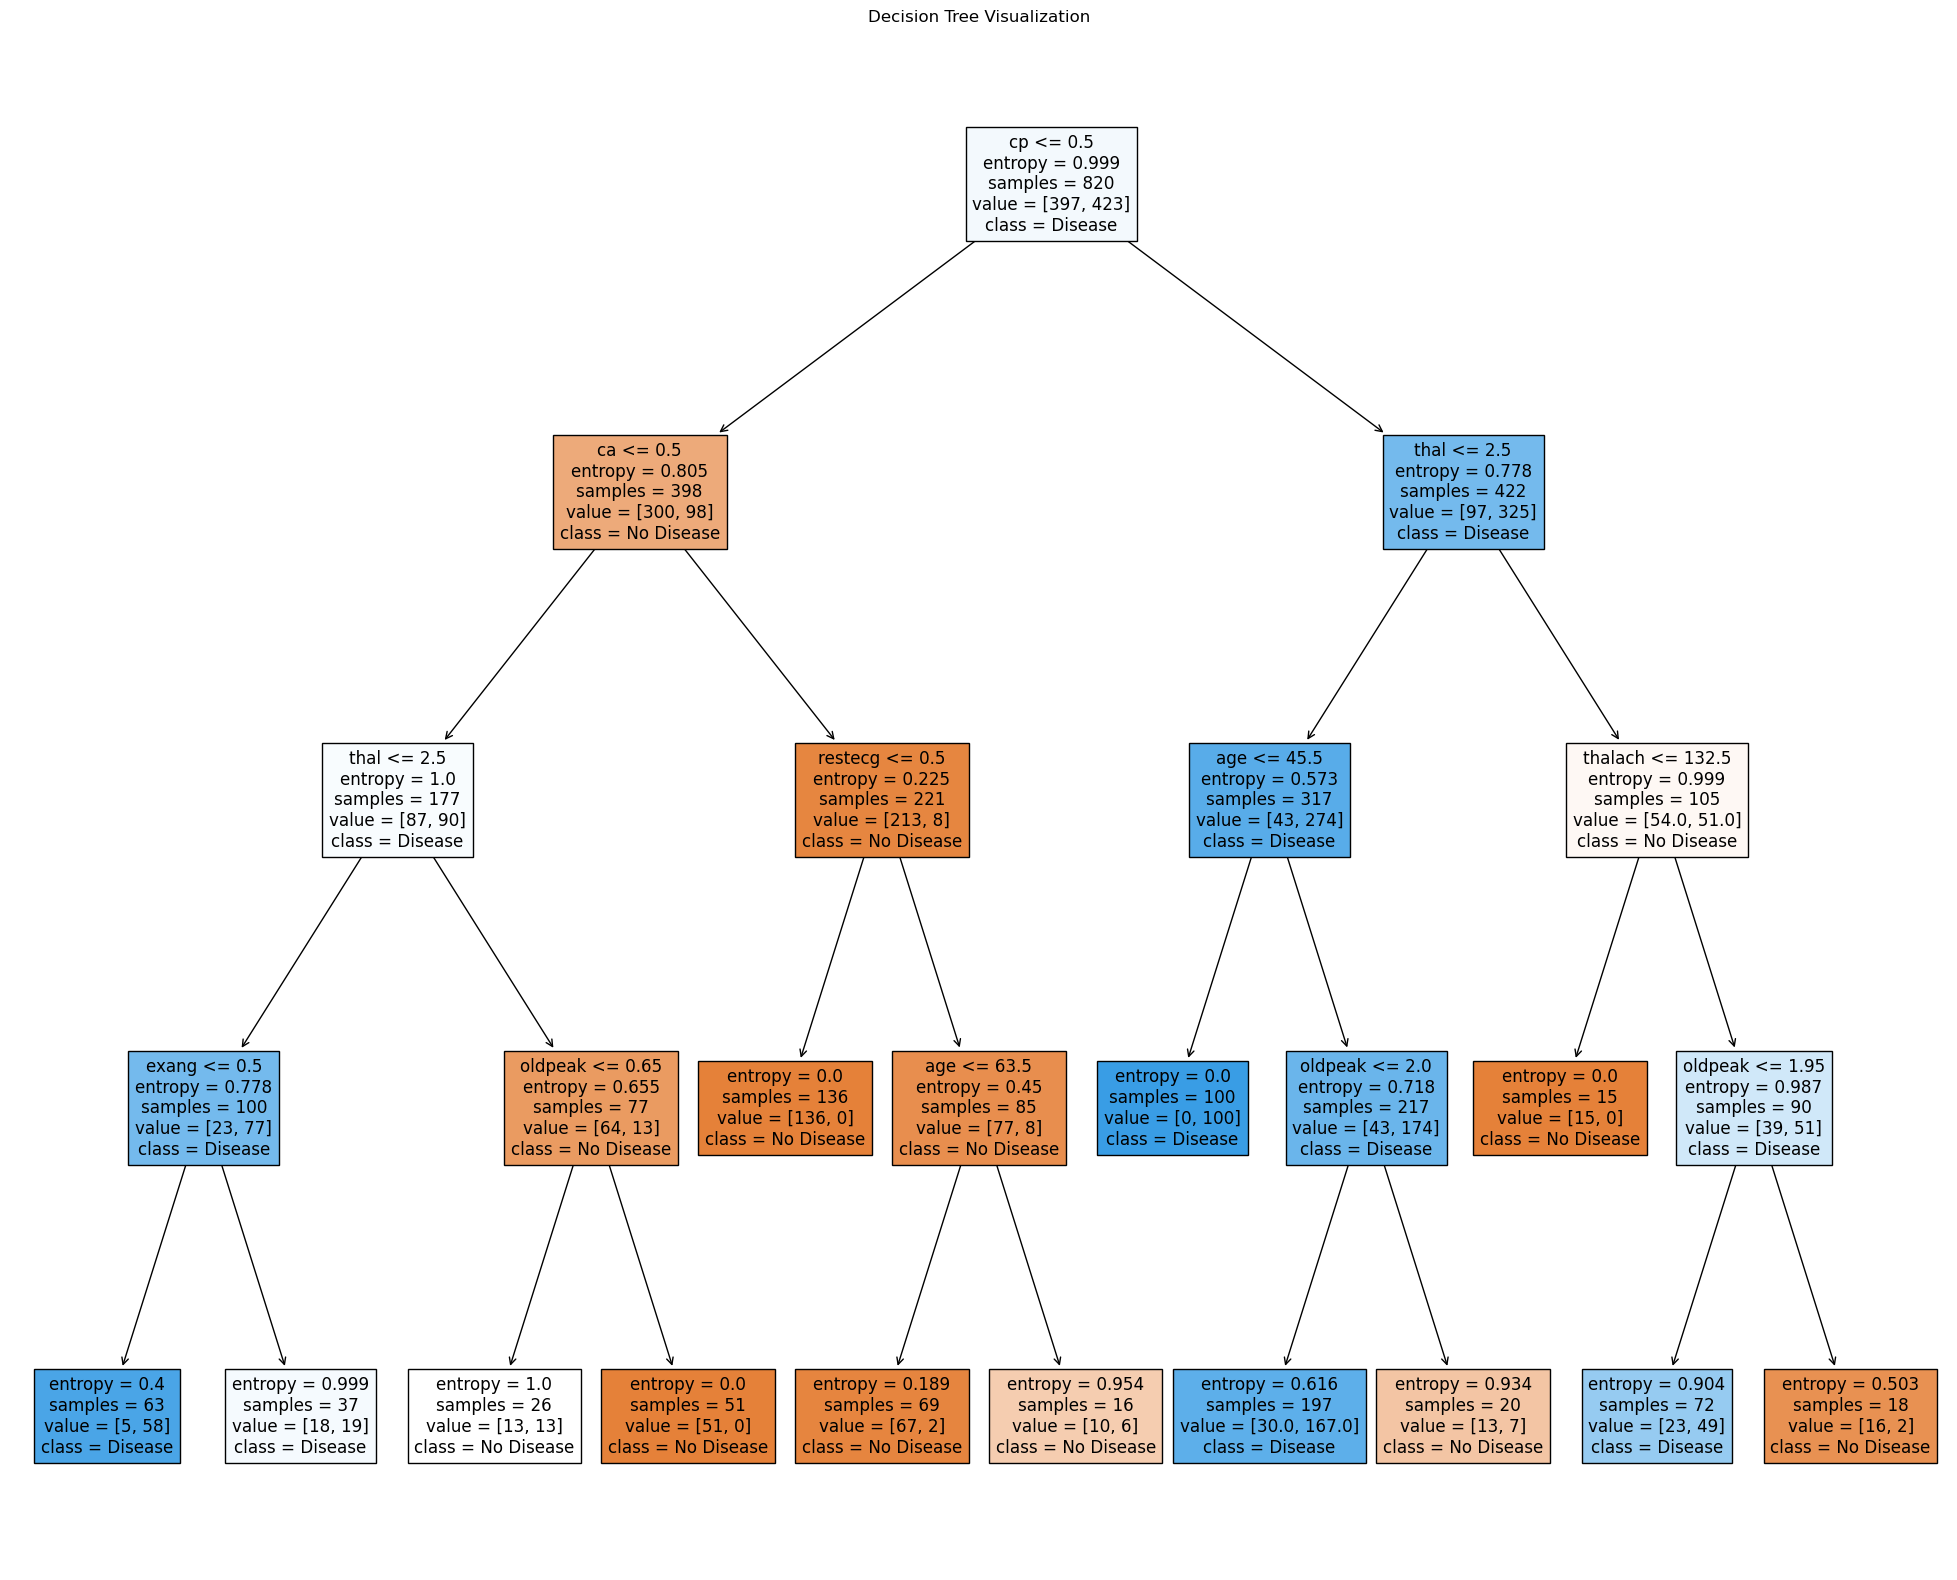

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree 
%matplotlib inline
plt.figure(figsize=(25, 20))
tree.plot_tree(classifier,
               feature_names=X.columns,
               class_names=['No Disease', 'Disease'],
               filled=True)
plt.title('Decision Tree Visualization')
plt.show()

**3.RandomForestClassifier**

In [37]:
#Initalize and train the random forest classifier 
rf_classifier = RandomForestClassifier(n_estimators=2, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(n_estimators=2, random_state=42)

In [38]:
#predict and evaluate
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy:0.94
Confusion Matrix:
 [[102   0]
 [ 12  91]]


In [39]:
classifier = RandomForestClassifier(criterion='gini', max_depth=4, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [40]:
# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.84
Confusion Matrix:
[[78 24]
 [ 9 94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.83       102
           1       0.80      0.91      0.85       103

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205



In [41]:
classifier = RandomForestClassifier(criterion='entropy', max_depth=4, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, random_state=42)

In [42]:
# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.84
Confusion Matrix:
[[80 22]
 [10 93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       102
           1       0.81      0.90      0.85       103

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205



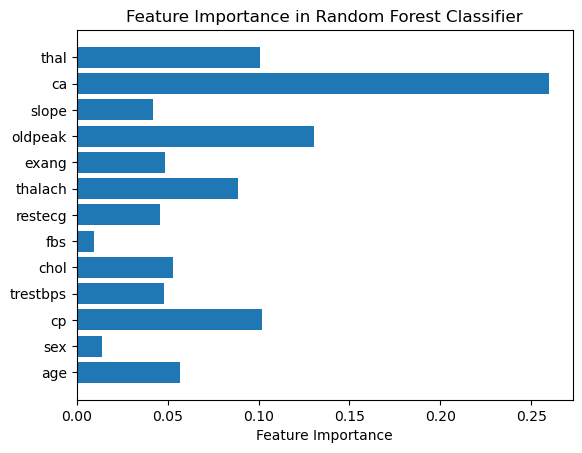

In [43]:
# Feature importance for the classifier
import matplotlib.pyplot as plt

feature_importances = rf_classifier.feature_importances_
features = X.columns
plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Classifier")
plt.show()

# **Hyperparameter Tuning**

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV with Decision Tree Classifier
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9804878048780488


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV with Random Forest Classifier
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9841463414634146


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Define hyperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2', 'l1'],
    'solver': ['liblinear', 'saga']
}

# Initialize GridSearchCV with Logistic Regression
grid_search = GridSearchCV(LogisticRegression(max_iter=2000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8548780487804878


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [27]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [29]:
X = df.drop('target', axis=1)
y = df['target']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Initialize individual models
log_clf = LogisticRegression(max_iter=1000, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
knn_clf = KNeighborsClassifier()

In [35]:
# Create a voting classifier using these models
voting_clf = VotingClassifier(
    estimators=[('log_reg', log_clf), ('decision_tree', dt_clf), ('knn', knn_clf)],
    voting='hard'  # or 'soft' for probability-based voting
)

In [37]:
# Fit the voting classifier to the training data
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('decision_tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier())])

In [39]:
# Predict and evaluate
y_pred = voting_clf.predict(X_test)
print("Ensemble Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))

Ensemble Voting Classifier Accuracy: 0.8829268292682927


In [41]:
# Individual model performance for comparison
for clf in (log_clf, dt_clf, knn_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred_individual = clf.predict(X_test)
    print(clf.__class__.__name__, "Accuracy:", accuracy_score(y_test, y_pred_individual))

LogisticRegression Accuracy: 0.7951219512195122
DecisionTreeClassifier Accuracy: 0.9853658536585366
KNeighborsClassifier Accuracy: 0.7317073170731707
VotingClassifier Accuracy: 0.8829268292682927
